<a href="https://colab.research.google.com/github/harsh-ux/PRML-Mini_Project/blob/main/mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/My Drive/ML/Minor Project/'

In [7]:
import os
print(os.path)

mask_dir = os.path.join(path, 'maskedfinal/')
nomask_dir = os.path.join(path, 'nonmaskedfinal/')

<module 'posixpath' from '/usr/lib/python3.7/posixpath.py'>


In [8]:
mask_img = os.listdir(mask_dir)
print(mask_img[:10])
nomask_img = os.listdir(nomask_dir)
print(nomask_img[:10])

['0_0_682b06c1gy1fr21u77bcrj21110rsql7.jpg', '1_0_13 (4).jpg', '0_0_2 (92).jpg', '0_0_0 (33).jpg', '0_0_27 (2).jpg', '0_0_4 (28).jpg', '1_0_0.jpeg', '0_0_7 (42).jpg', '1_0_3 (4).jpg', '1_1_8.jpg']
['1_0_wuzun_0071.jpg', '1_0_yangying_0187.jpg', '1_0_zhangbinbin_0055.jpg', '0_0_xuejianing_0215.jpg', '1_0_xulu1_0136.jpg', '1_0_yanggongru_0179.jpg', '0_0_wujunyu_0126.jpg', '0_0_renquan_0014.jpg', '1_0_yanggongru_0133.jpg', '1_0_xinzhilei_0209.jpg']


In [43]:
print(mask_img[884])

0_0_1 (3).jpg


In [33]:
data_mask = []
for i in mask_img:
    data_mask.append(mask_dir+i)
print(data_mask)

['/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_682b06c1gy1fr21u77bcrj21110rsql7.jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/1_0_13 (4).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_2 (92).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_0 (33).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_27 (2).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_4 (28).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/1_0_0.jpeg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_7 (42).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/1_0_3 (4).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/1_1_8.jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_13 (30).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_12 (19).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_11 (37).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_2

In [18]:
data_nonmask = []
for i in nomask_img:
    data_nonmask.append(nomask_dir+i)
print(data_nonmask)

['/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_wuzun_0071.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_yangying_0187.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_zhangbinbin_0055.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/0_0_xuejianing_0215.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_xulu1_0136.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_yanggongru_0179.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/0_0_wujunyu_0126.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/0_0_renquan_0014.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_yanggongru_0133.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_xinzhilei_0209.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_yangying_0039.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_wuzongxian_0155.jpg', '/content/drive/My Driv

(1, 64, 64, 3)


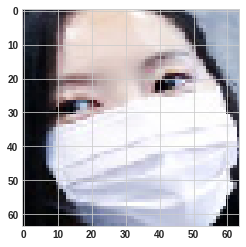

In [16]:
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array

img = data[0]
img = image.load_img(img, target_size = (64, 64))
plt.imshow(img)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
print(img.shape)

In [48]:
print(data_mask[900])
label = 1
ime = cv2.imread(data_mask[900])
ime = cv2.cvtColor(ime, cv2.COLOR_BGR2GRAY)
ime = cv2.resize(ime, (64,64))
ime = ime.flatten()

/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_1 (106).jpg


error: ignored

In [49]:
dataset = []
labels = []
from keras.preprocessing import image
for i in data_mask:
  print(i)
  label = 1
  ime = cv2.imread(i)
  if(ime is not None):
    ime = cv2.cvtColor(ime, cv2.COLOR_BGR2GRAY)
    ime = cv2.resize(ime, (64,64))
    ime = ime.flatten()
    dataset.append(ime)
    labels.append(label)
  # ime = image.load_img(i, target_size=(64, 64))
  # ime = image.img_to_array(ime)
  # ime = preprocess_input(ime)
  

/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_682b06c1gy1fr21u77bcrj21110rsql7.jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/1_0_13 (4).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_2 (92).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_0 (33).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_27 (2).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_4 (28).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/1_0_0.jpeg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_7 (42).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/1_0_3 (4).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/1_1_8.jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_13 (30).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_12 (19).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_11 (37).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_2_24.jpg
/content/drive/My Drive/ML/Minor 

In [50]:
dataset1 = []
labels1 = []
from keras.preprocessing import image
for i in data_nonmask:
  print(i)
  label = 0
  ime = cv2.imread(i)
  if(ime is not None):
    ime = cv2.cvtColor(ime, cv2.COLOR_BGR2GRAY)
    ime = cv2.resize(ime, (64,64))
    ime = ime.flatten()
    dataset1.append(ime)
    labels1.append(label)

/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_wuzun_0071.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_yangying_0187.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_zhangbinbin_0055.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/0_0_xuejianing_0215.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_xulu1_0136.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_yanggongru_0179.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/0_0_wujunyu_0126.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/0_0_renquan_0014.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_yanggongru_0133.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_xinzhilei_0209.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_yangying_0039.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_wuzongxian_0155.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_

In [51]:
print(len(dataset), len(labels))

1374 1374


In [54]:
print(dataset1[0].shape)

(4096,)


In [52]:
print(len(dataset1), len(labels1))

2487 2487


In [56]:
nonmask_df = pd.DataFrame(data=dataset1)

In [58]:
nonmask_df['Label'] = labels1

In [59]:
nonmask_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,Label
0,9,9,9,12,14,21,25,23,15,9,8,12,19,21,23,24,24,22,19,24,30,35,38,39,40,44,46,44,38,38,38,37,36,32,34,35,37,34,38,43,...,225,225,223,223,223,222,222,224,221,222,216,200,152,80,91,151,191,203,208,208,214,212,195,158,133,117,100,94,100,109,114,111,109,98,77,46,63,74,61,0
1,206,205,203,200,199,199,193,192,189,187,184,184,183,181,182,182,182,182,183,183,183,184,183,182,181,178,178,177,181,180,180,182,182,183,179,173,176,174,173,177,...,129,129,129,129,130,133,137,140,141,144,146,149,151,154,163,171,177,182,185,187,188,191,193,195,198,202,204,216,234,244,245,245,247,249,248,248,247,246,247,0
2,30,25,28,33,35,34,33,34,34,33,34,38,39,36,31,38,39,37,32,29,29,30,30,31,36,38,36,32,27,25,27,28,32,35,35,32,28,29,33,37,...,165,163,163,166,169,165,165,158,147,136,135,133,126,119,124,126,133,144,154,157,133,100,75,63,61,63,63,58,57,57,53,52,53,53,52,49,50,51,53,0
3,253,253,249,239,197,155,137,137,134,135,135,135,135,135,134,133,132,130,130,127,125,124,123,120,119,120,123,120,118,120,120,126,123,123,124,118,118,122,121,125,...,100,104,102,137,169,181,190,192,194,198,203,204,207,208,208,210,214,216,216,214,218,221,219,220,221,224,225,224,222,223,222,222,222,221,218,216,216,211,204,0
4,44,44,43,42,43,45,46,47,48,49,48,53,55,53,50,49,53,63,71,75,82,90,95,96,92,86,83,83,82,79,78,74,75,84,93,107,122,133,144,151,...,229,233,235,234,238,240,240,243,245,247,248,251,251,251,251,252,253,254,254,254,254,254,254,253,253,254,252,251,251,249,247,243,239,233,229,205,164,118,86,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,26,26,26,26,27,26,27,29,29,29,27,27,29,31,33,33,31,29,29,31,33,38,43,45,43,38,38,33,31,29,25,25,26,27,28,30,28,31,30,28,...,59,70,79,86,90,96,100,103,108,115,117,119,119,116,116,117,116,118,115,115,107,71,88,129,146,155,159,160,149,150,154,156,156,154,151,148,148,154,143,0
2483,23,26,20,18,24,21,17,15,20,22,20,20,21,20,20,21,22,25,27,31,34,35,34,31,34,35,33,34,32,30,33,38,36,33,39,33,35,40,38,43,...,65,63,68,76,80,84,88,92,97,100,98,97,96,98,100,102,107,113,129,150,178,190,200,199,188,187,197,205,208,198,173,180,199,204,202,200,189,189,182,0
2484,64,60,56,37,31,40,53,56,63,69,71,66,54,50,53,60,62,64,66,74,81,78,79,77,75,80,68,61,66,66,64,58,53,80,105,117,115,111,105,100,...,86,86,87,86,85,84,82,83,83,84,85,86,83,82,85,86,84,88,93,95,100,111,119,130,141,151,156,163,186,224,232,235,230,213,193,148,65,42,34,0
2485,233,193,135,91,68,56,54,53,32,17,10,11,16,12,12,14,18,19,21,28,31,32,37,42,47,58,72,86,101,118,134,148,154,165,168,170,170,168,166,162,...,229,229,229,226,220,215,210,201,192,182,176,172,164,153,151,152,157,167,179,186,191,197,198,196,196,196,194,192,177,133,77,40,30,23,15,19,23,21,13,0


In [60]:
mask_df = pd.DataFrame(data=dataset)

In [61]:
mask_df['Label'] = labels

In [62]:
mask_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,Label
0,19,23,43,63,62,56,46,38,34,52,45,32,34,47,70,100,139,176,193,206,216,219,221,220,220,221,223,222,221,222,226,231,240,234,215,182,156,110,74,48,...,133,129,139,142,140,150,158,160,160,163,170,183,195,200,201,201,201,200,199,198,196,198,199,202,206,207,210,215,220,226,159,24,2,4,3,4,7,5,3,1
1,59,59,59,54,51,55,62,71,67,62,56,54,56,55,56,61,66,73,86,100,113,123,129,127,124,128,131,134,137,140,147,154,163,165,164,160,156,152,144,132,...,168,169,175,177,176,182,187,189,188,186,183,181,179,180,182,179,175,171,160,141,149,155,140,100,34,22,23,31,33,26,25,25,23,22,22,21,21,23,24,1
2,38,29,31,42,37,26,21,22,20,25,28,33,50,67,73,82,98,81,83,99,97,101,111,121,124,123,121,117,119,121,122,123,124,121,120,125,123,120,123,120,...,26,23,19,15,12,11,12,11,11,14,15,15,19,20,21,21,24,30,80,143,162,162,161,165,163,159,158,156,159,155,147,121,64,38,51,51,54,54,51,1
3,215,218,212,206,202,205,191,178,193,201,201,202,204,207,204,193,192,168,134,106,116,147,174,199,214,220,221,222,225,226,226,228,223,223,222,225,224,227,223,221,...,179,177,176,178,179,179,178,179,181,181,180,179,177,177,176,174,172,173,170,165,160,151,146,146,143,146,141,133,131,121,100,65,37,23,15,13,17,18,19,1
4,127,126,124,121,117,117,115,111,109,107,102,92,83,70,61,62,65,71,78,85,90,96,96,97,98,99,100,101,103,103,102,101,100,99,97,96,95,93,91,91,...,142,140,139,140,139,138,139,141,143,147,151,154,159,165,170,176,181,184,186,190,194,197,202,207,210,212,215,219,221,222,225,226,228,230,232,231,232,239,234,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,32,33,37,31,32,31,30,36,39,46,51,60,78,101,96,119,126,133,137,142,144,152,154,161,163,167,172,176,179,185,188,190,194,203,201,199,195,187,183,173,...,74,70,65,57,53,50,45,43,37,44,59,82,71,9,12,16,16,18,16,14,17,50,147,146,45,38,75,43,22,30,21,18,17,16,16,17,17,17,17,1
1370,117,136,154,173,189,204,210,215,219,223,227,231,236,238,239,239,239,237,235,234,235,237,237,237,239,239,237,236,235,235,234,235,236,236,236,237,237,237,237,238,...,36,36,36,36,36,39,43,44,42,41,43,47,48,48,48,50,51,47,44,56,92,141,191,227,221,220,219,214,205,198,195,195,199,206,209,211,214,215,213,1
1371,208,220,213,213,227,188,167,66,5,3,5,8,11,14,16,18,20,21,22,22,24,26,30,27,29,31,33,33,36,39,34,43,39,42,35,37,37,36,34,37,...,211,213,214,216,217,218,219,217,217,218,216,215,214,209,208,217,237,237,215,187,178,154,179,196,192,175,169,178,186,163,190,213,183,163,176,177,150,161,174,1
1372,77,99,131,166,186,203,209,211,217,219,219,216,213,211,211,211,211,212,213,212,211,209,208,208,208,209,208,206,205,204,202,203,203,203,201,203,207,211,210,209,...,25,25,25,26,27,28,28,28,27,27,26,26,26,27,28,28,27,26,26,26,26,27,35,17,30,18,50,133,159,163,154,90,66,84,93,125,186,231,239,1


In [66]:
main_df = pd.concat([nonmask_df, mask_df])

In [67]:
main_df.reset_index(drop=True)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,Label
0,9,9,9,12,14,21,25,23,15,9,8,12,19,21,23,24,24,22,19,24,30,35,38,39,40,44,46,44,38,38,38,37,36,32,34,35,37,34,38,43,...,225,225,223,223,223,222,222,224,221,222,216,200,152,80,91,151,191,203,208,208,214,212,195,158,133,117,100,94,100,109,114,111,109,98,77,46,63,74,61,0
1,206,205,203,200,199,199,193,192,189,187,184,184,183,181,182,182,182,182,183,183,183,184,183,182,181,178,178,177,181,180,180,182,182,183,179,173,176,174,173,177,...,129,129,129,129,130,133,137,140,141,144,146,149,151,154,163,171,177,182,185,187,188,191,193,195,198,202,204,216,234,244,245,245,247,249,248,248,247,246,247,0
2,30,25,28,33,35,34,33,34,34,33,34,38,39,36,31,38,39,37,32,29,29,30,30,31,36,38,36,32,27,25,27,28,32,35,35,32,28,29,33,37,...,165,163,163,166,169,165,165,158,147,136,135,133,126,119,124,126,133,144,154,157,133,100,75,63,61,63,63,58,57,57,53,52,53,53,52,49,50,51,53,0
3,253,253,249,239,197,155,137,137,134,135,135,135,135,135,134,133,132,130,130,127,125,124,123,120,119,120,123,120,118,120,120,126,123,123,124,118,118,122,121,125,...,100,104,102,137,169,181,190,192,194,198,203,204,207,208,208,210,214,216,216,214,218,221,219,220,221,224,225,224,222,223,222,222,222,221,218,216,216,211,204,0
4,44,44,43,42,43,45,46,47,48,49,48,53,55,53,50,49,53,63,71,75,82,90,95,96,92,86,83,83,82,79,78,74,75,84,93,107,122,133,144,151,...,229,233,235,234,238,240,240,243,245,247,248,251,251,251,251,252,253,254,254,254,254,254,254,253,253,254,252,251,251,249,247,243,239,233,229,205,164,118,86,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,32,33,37,31,32,31,30,36,39,46,51,60,78,101,96,119,126,133,137,142,144,152,154,161,163,167,172,176,179,185,188,190,194,203,201,199,195,187,183,173,...,74,70,65,57,53,50,45,43,37,44,59,82,71,9,12,16,16,18,16,14,17,50,147,146,45,38,75,43,22,30,21,18,17,16,16,17,17,17,17,1
3857,117,136,154,173,189,204,210,215,219,223,227,231,236,238,239,239,239,237,235,234,235,237,237,237,239,239,237,236,235,235,234,235,236,236,236,237,237,237,237,238,...,36,36,36,36,36,39,43,44,42,41,43,47,48,48,48,50,51,47,44,56,92,141,191,227,221,220,219,214,205,198,195,195,199,206,209,211,214,215,213,1
3858,208,220,213,213,227,188,167,66,5,3,5,8,11,14,16,18,20,21,22,22,24,26,30,27,29,31,33,33,36,39,34,43,39,42,35,37,37,36,34,37,...,211,213,214,216,217,218,219,217,217,218,216,215,214,209,208,217,237,237,215,187,178,154,179,196,192,175,169,178,186,163,190,213,183,163,176,177,150,161,174,1
3859,77,99,131,166,186,203,209,211,217,219,219,216,213,211,211,211,211,212,213,212,211,209,208,208,208,209,208,206,205,204,202,203,203,203,201,203,207,211,210,209,...,25,25,25,26,27,28,28,28,27,27,26,26,26,27,28,28,27,26,26,26,26,27,35,17,30,18,50,133,159,163,154,90,66,84,93,125,186,231,239,1


In [68]:
main_df.sample(frac=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,Label
781,41,29,20,23,21,18,20,22,32,27,24,16,13,12,12,12,12,13,14,15,16,17,16,23,23,31,44,27,34,38,48,37,43,47,66,51,54,66,53,67,...,40,47,40,41,43,36,40,65,91,93,88,85,90,95,92,98,108,118,129,132,134,145,150,147,156,166,166,175,177,181,186,192,196,193,196,202,201,201,203,1
2237,3,2,2,2,2,5,8,9,4,5,7,8,10,11,11,12,10,9,9,7,6,8,10,12,13,13,15,17,14,11,7,5,7,9,6,2,3,3,3,4,...,176,166,158,140,133,127,116,108,104,95,79,67,52,30,21,19,27,30,26,23,23,25,26,25,28,29,29,28,27,27,27,27,25,24,25,26,24,26,27,0
1602,37,36,35,36,37,41,46,48,58,66,62,66,70,71,68,67,62,54,46,46,54,54,53,44,46,50,54,56,58,62,63,51,47,50,53,41,40,45,46,48,...,132,141,143,148,155,155,151,148,150,150,147,148,135,107,84,80,105,77,96,166,177,151,156,171,184,193,192,191,190,191,190,189,190,190,188,188,187,187,187,0
333,31,32,32,40,44,45,47,49,50,52,57,61,63,64,68,67,68,69,69,66,73,77,79,81,88,96,105,114,125,135,135,132,124,116,108,100,92,84,80,75,...,127,134,137,140,144,150,155,156,155,155,154,153,151,152,153,151,149,147,147,145,141,135,131,122,112,108,111,110,105,104,102,97,92,90,93,87,82,75,66,0
605,37,38,37,39,37,37,36,32,32,32,30,27,25,21,19,16,15,15,14,18,26,34,38,39,41,41,42,39,39,36,30,27,28,29,29,30,31,30,31,31,...,115,111,104,102,97,92,89,91,93,95,98,100,97,92,86,68,48,39,29,25,25,26,23,18,12,11,10,7,7,9,9,7,8,10,9,7,7,7,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,69,67,65,65,67,68,67,65,63,64,64,66,70,73,74,77,81,83,85,89,90,94,103,114,119,122,129,130,136,136,139,141,143,141,138,137,133,126,113,105,...,188,190,193,195,195,196,196,196,197,198,198,194,191,193,195,195,196,196,196,197,197,201,204,205,204,200,189,176,158,136,112,77,41,27,28,33,34,33,33,1
2336,41,40,37,40,45,52,53,59,67,74,78,83,84,89,93,100,107,112,114,110,107,101,104,109,119,119,112,98,89,79,71,60,51,41,36,37,39,43,51,63,...,10,11,14,15,13,16,22,37,47,62,67,68,71,79,87,96,97,93,87,86,90,87,78,74,69,70,73,78,82,77,69,61,51,49,51,46,38,32,27,0
682,115,114,98,94,84,78,76,75,76,79,77,74,65,62,63,66,68,72,74,78,83,90,100,107,113,121,126,129,134,134,129,125,120,114,112,106,102,107,97,87,...,96,100,102,105,102,101,97,79,63,45,38,43,83,128,127,118,111,104,102,94,92,99,91,73,63,49,50,62,66,53,29,17,16,15,13,13,13,13,15,0
380,42,46,45,39,30,34,39,35,36,39,35,43,42,41,40,41,35,48,28,37,29,33,42,41,37,30,44,39,30,39,35,36,37,35,26,23,40,31,28,29,...,125,128,125,121,114,113,116,118,116,113,110,104,100,100,100,99,100,103,110,120,127,125,123,122,120,117,117,115,119,128,139,149,155,164,163,161,161,160,160,1


In [69]:
main_df.to_csv('imagedata.csv')

In [ ]:
data = np.array(data, dtype="float32")
labels = np.array(labels)